___

<center><h1>Supply Chain Analysis</h1></center>

___

<center><h2>DSM020 - Data Programming in Python</h2></center><br>
<center><strong>Teacher:</strong> Sean McGrath </center>

___
<p></p>
<center style="color: #AA6373; font-weight: 400;"><strong>Presented by:</strong></center>
<center style="color: #AA6373; font-weight: 400;">Jorge Forero L.</center>
<center style="color: #AA6373; font-weight: 400;">Student Number: 240323983</center>
<center style="color: #AA6373; font-weight: 400;">Student Portal Username: JEFL1</center>
<center>August 2024</center>
<p></p>

# Introduction
The current

# Project background and Context
This project addresse

# Aims and Objectives
The primary aim of

### Objectives

1. Gather c

# Data Requirements
For this project

## Rationale for Data Selection
We chose to use data from the last five seasons of the Premier League to ensure our analysis captures recent trends and variations while providing a sufficiently large dataset for robust statistical analysis. This timeframe allows us to:

1. Ide

## Data Utilized
The data we collected includes the following key variables:

- Match Results: Full-time and half-time results for each match, indicating home wins, away wins, and draws.
- Goals Statistic

## Limitations and constrains of the Data

While the dataset from football-data.co.uk is extensive, there are some limitations and constraints to consider:

1. Lack of

## Ethical Considerations
In conducting this analysis, we are mindful of several ethical considerations:

- Ensuring the privacy and security of any sensitive information is paramount. While our dataset does not include personally identifiable information, we will handle all data with care and adhere to best practices in data security.
- Our analysis aims to provide insights into betting odds and their correlation with match outcomes. It is important to approach this analysis responsibly, recognizing the potential impact on individuals and communities involved in sports betting. We advocate for responsible betting practices and caution against excessive gambling.
- We strive to maintain transparency in our analysis methods and ensure that our findings are reproducible. This includes clearly documenting our data sources, analytical techniques, and any assumptions made during the analysis process.

By acknowledging these limitations and ethical considerations, we aim to conduct a rigorous and responsible analysis that provides valuable insights while maintaining the highest standards of integrity and ethical conduct.

In [41]:
# Common Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import s3fs

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Testing and Evaluation
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

## Data Understanding

This phase involves collecting the data, describing its attributes and performing the data exploratory analysis. For this coursework we use data that can be found in open data sources [1]. The data used to develop this project was selected given the requirements described by the instru ctor of the subject.

### Data Load

In [42]:
# Using the address for the .csv file from the GitHub repository
url = 'https://raw.githubusercontent.com/jforeroluque/Supply_Chain_Analysis/main/DataCoSupplyChainDataset.csv'

# Load the CSV file into a DataFrame, specifying the encoding
df_supply = pd.read_csv(url, encoding='ISO-8859-1', on_bad_lines='skip')

# Display the DataFrame
print(df_supply.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        

In [43]:
print(df_supply.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

### Volume of the data

In [44]:
# Records
num_records = len(df_supply)

# Features
num_features = len(df_supply.columns)

print(f"The dataset has {num_records} records and {num_features} features.")

The dataset has 180519 records and 53 features.


### Features explanation 

|Feature| Explanation|
|:-:|:---|
|Type| Type of transaction made
|Days for shipping (real)| Actual shipping days of the purchased product
|Days for shipment (scheduled)| Days of scheduled delivery of the purchased product
|Benefit per order| Earnings per order placed
|Sales per customer| Total sales per customer made per customer
|Delivery Status| Delivery status of orders| Advance shipping , Late delivery , Shipping canceled , Shipping on tim...
|Late_delivery_risk| Categorical variable that indicates if sending is late (1), it is not late (0).
|Category Id| Product category code
|Category Name| Description of the product category
|Customer City| City where the customer made the purchase
|Customer Country| Country where the customer made the purchase
|Customer Email| Customer's email
|Customer Fname| Customer name
|Customer Id| Customer ID
|Customer Lname| Customer lastname
|Customer Password| Masked customer key
|Customer Segment| Types of Customers| Consumer , Corporate , Home Office
|Customer State| State to which the store where the purchase is registered belongs
|Customer Street| Street to which the store where the purchase is registered belongs
|Customer Zipcode| Customer Zipcode
|Department Id| Department code of store
|Department Name| Department name of store
|Latitude| Latitude corresponding to location of store
|Longitude| Longitude corresponding to location of store
|Market| Market to where the order is delivered | Africa , Europe , LATAM , Pacific Asia , USCA
|Order City| Destination city of the order
|Order Country| Destination country of the order
|Order Customer Id| Customer order code
|order date (DateOrders)| Date on which the order is made
|Order Id| Order code
|Order Item Cardprod Id| Product code generated through the RFID reader
|Order Item Discount| Order item discount value
|Order Item Discount Rate| Order item discount percentage
|Order Item Id| Order item code
|Order Item Product Price| Price of products without discount
|Order Item Profit Ratio| Order Item Profit Ratio
|Order Item Quantity| Number of products per order
|Sales| Value in sales
|Order Item Total| Total amount per order
|Order Profit Per Order| Order Profit Per Order
|Order Region| Region of the world where the order is delivered | Southeast Asia ,South Asia ,Oceania ,Eastern ...
|Order State| State of the region where the order is delivered
|Order Status| Order Status | COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FR...
|Product Card Id| Product code
|Product Category Id| Product category code
|Product Description| Product Description
|Product Image| Link of visit and purchase of the product
|Product Name| Product Name
|Product Price| Product Price
|Product Status| Status of the product stock |If it is 1 not available , 0 the product is available
|Shipping date (DateOrders)| Exact date and time of shipment
|Shipping Mode| The following shipping modes are presented | Standard Class , First Class , Second Class , Same D..."

## Exploratory Data Analysis

### Missing Values

We will be dropping the rows with missing values in the features that are the most relevant for the analysis we will be doing in this project. 

In [45]:
# Dropping rows with missing values in critical columns
df_cleaned = df_supply.dropna(subset=[
    "Late_delivery_risk",
    "Order Item Product Price",
    "Order Item Quantity",
    "Days for shipment (scheduled)",
    "Days for shipping (real)",
    "Customer Segment",
    "Order Country",
    "Shipping Mode"
])

# Show the first 5 rows of cleaned data
df_cleaned.head(5)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#### Numerical Feature Summary

In [46]:
# Summary statistics
df_cleaned.describe()


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


#### Categorical Feature Summary

Here we assess the distribution of values across categorical features and identifying missing data

In [47]:
# Set the count to distinct values in each categorical feature
for col_name in ['Shipping Mode', 'Order Region', 'Order Country', 'Product Category Id', 'Customer Segment', 'Order Status', 'Market']:
    print(f"\nDistinct counts for {col_name}:")
    print(df_cleaned[col_name].value_counts())



Distinct counts for Shipping Mode:
Shipping Mode
Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: count, dtype: int64

Distinct counts for Order Region:
Order Region
Central America    28341
Western Europe     27109
South America      14935
Oceania            10148
Northern Europe     9792
Southeast Asia      9539
Southern Europe     9431
Caribbean           8318
West of USA         7993
South Asia          7731
Eastern Asia        7280
East of USA         6915
West Asia           6009
US Center           5887
South of  USA       4045
Eastern Europe      3920
West Africa         3696
North Africa        3232
East Africa         1852
Central Africa      1677
Southern Africa     1157
Canada               959
Central Asia         553
Name: count, dtype: int64

Distinct counts for Order Country:
Order Country
Estados Unidos                     24840
Francia                            13222
México                             13172
Al

In [48]:
# Count the number of missing values in each column to be sure
print("\nMissing values in each column:")
print(df_cleaned.isnull().sum())


Missing values in each column:
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market  

##### Removing Unnecessary Columns

We Remove unnecessary columns that won't be considered for the analysis

In [49]:
# List of columns to drop
columns_to_drop = [
    'Customer Email', 'Customer Fname', 'Customer Id',
    'Customer Lname', 'Customer Password', 'Customer Street',
    'Customer Zipcode', 'Product Description', 'Product Image', 'Latitude', 'Longitude',
]

# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Display the first few rows to confirm
df_cleaned.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Id,Department Name,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2,Fitness,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2,Fitness,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Consumer,CA,2,Fitness,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,2,Fitness,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,2,Fitness,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#### Class Imbalance Analysis

Here we determine the distribution of the target feature "Late Delivery Risk" where we want to assess class imbalance that is a critical factor to implement Machine Learning Models

In [50]:
# Count the number of occurrences for each class in 'Late_delivery_risk'
late_delivery_counts = df_cleaned['Late_delivery_risk'].value_counts()

# Display the counts
print("Count of occurrences for each class in 'Late_delivery_risk':")
print(late_delivery_counts)

Count of occurrences for each class in 'Late_delivery_risk':
Late_delivery_risk
1    98977
0    81542
Name: count, dtype: int64


In [51]:
# Calculate the total number of records
total_count = len(df_cleaned)

# Calculate the percentage distribution
late_delivery_percentage = (late_delivery_counts / total_count) * 100

# Combine counts and percentages into a DataFrame
late_delivery_distribution = pd.DataFrame({
    'count': late_delivery_counts,
    'percentage': late_delivery_percentage
})

# Display the distribution
print("\nDistribution in terms of percentages:")
late_delivery_distribution


Distribution in terms of percentages:


,count,percentage
Late_delivery_risk,,
1,98977,54.829132
0,81542,45.170868


#### Correlation Analysis (Numerical Features)

Here we try to understand and identify the strength and direction of relationships between the numerical features and the target variable "Late Delivery Risk".

In [52]:
# List of numerical columns to calculate the correlation with 'Late_delivery_risk'
numerical_columns_corr = ['Days for shipment (scheduled)', 'Order Item Quantity', 'Order Item Total', 'Sales', 'Order Item Product Price']

# Ensure 'Late_delivery_risk' is numeric for correlation (if needed)
df_cleaned['Late_delivery_risk'] = pd.to_numeric(df_cleaned['Late_delivery_risk'], errors='coerce')

# Calculate and print the correlation for each numerical column with 'Late_delivery_risk'
for col_name in numerical_columns_corr:
    correlation = df_cleaned[[col_name, 'Late_delivery_risk']].corr().iloc[0, 1]
    print(f"Correlation between {col_name} and Late_delivery_risk: {correlation}")

Correlation between Days for shipment (scheduled) and Late_delivery_risk: -0.3693517719633493
Correlation between Order Item Quantity and Late_delivery_risk: -0.00013923280125116905
Correlation between Order Item Total and Late_delivery_risk: -0.0037912615226316356
Correlation between Sales and Late_delivery_risk: -0.003564360506914072
Correlation between Order Item Product Price and Late_delivery_risk: -0.002175249056545577


#### Visualizations

Here we intend to achieve visual insights into the distribution of the Late Dalivery Risk and its relationship with Shipping Mode


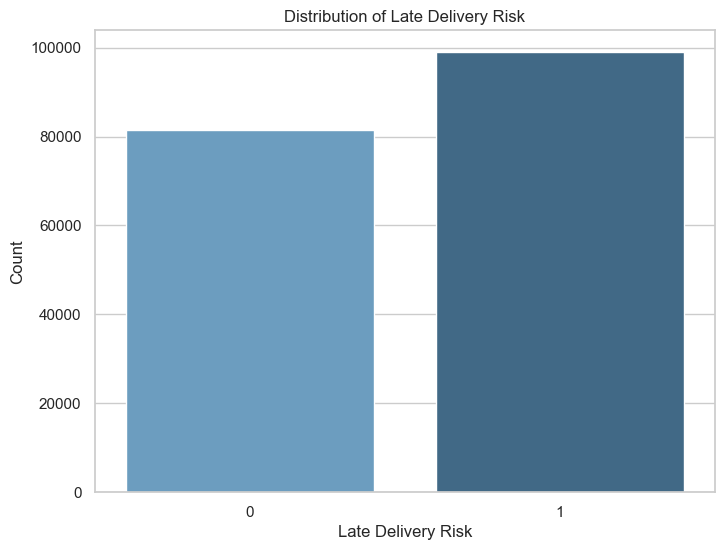

In [53]:
 # Count occurrences of 'Late_delivery_risk' using pandas
late_delivery_risk_df = df_cleaned.groupby("Late_delivery_risk").size().reset_index(name='count')

# Plot Late Delivery Risk using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Late_delivery_risk', y='count', hue='Late_delivery_risk', data=late_delivery_risk_df, palette='Blues_d', legend=False)
plt.xlabel('Late Delivery Risk')
plt.ylabel('Count')
plt.title('Distribution of Late Delivery Risk')
plt.show()

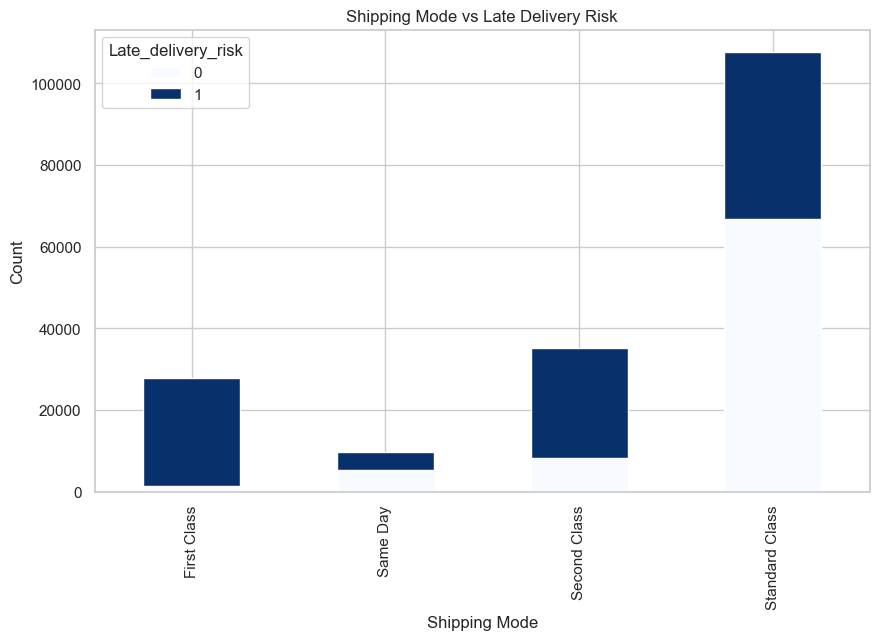

In [54]:
# Count occurrences of 'Shipping Mode' and 'Late_delivery_risk' using pandas
shipping_mode_df = df_cleaned.groupby(["Shipping Mode", "Late_delivery_risk"]).size().reset_index(name='count')

# Create a pivot table for visualization
shipping_mode_pivot = shipping_mode_df.pivot(index='Shipping Mode', columns='Late_delivery_risk', values='count')

# Plot Shipping Mode vs Late Delivery using seaborn
shipping_mode_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Blues')
plt.title("Shipping Mode vs Late Delivery Risk")
plt.ylabel("Count")
plt.show()

#### Shipping mode Analysis

This analysis would enable to evaluate the Shipping mode performance by looking at how frequently late daliveries occur for each shipping method. With this the company can determine which shipping methods may require optimization or further investigation to reduce late deliveries.

In [55]:
# Group by 'Shipping Mode' and calculate the number of late deliveries and total deliveries
shipping_mode_analysis = df_cleaned.groupby('Shipping Mode').agg(
    Late_Delivery_Count=pd.NamedAgg(column='Late_delivery_risk', aggfunc=lambda x: (x == 1).sum()),
    Total_Deliveries=pd.NamedAgg(column='Late_delivery_risk', aggfunc='size')
).reset_index()

# Calculate the percentage of late deliveries for each shipping mode
shipping_mode_analysis['Late_Delivery_Percentage'] = (shipping_mode_analysis['Late_Delivery_Count'] / shipping_mode_analysis['Total_Deliveries']) * 100

# Display the result
shipping_mode_analysis

,Shipping Mode,Late_Delivery_Count,Total_Deliveries,Late_Delivery_Percentage
0,First Class,26513,27814,95.322499
1,Same Day,4454,9737,45.743042
2,Second Class,26987,35216,76.632781
3,Standard Class,41023,107752,38.071683


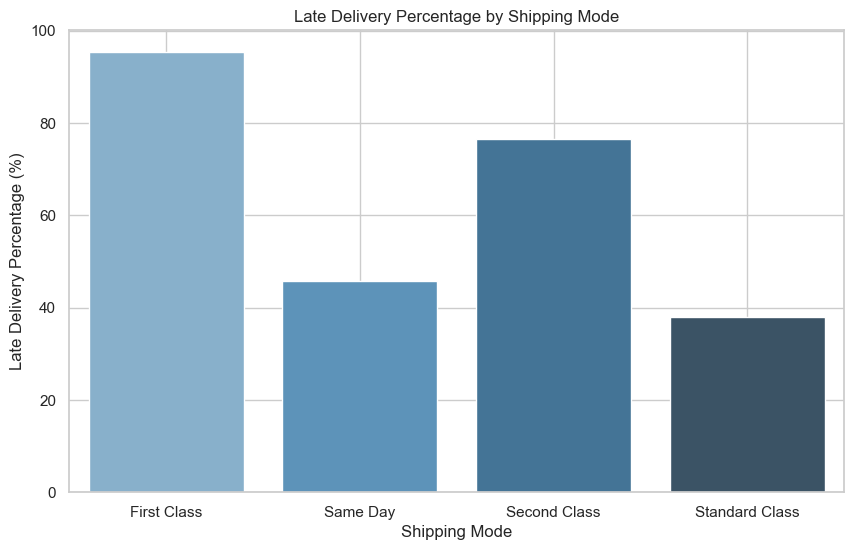

In [56]:
# Set up the figure size
plt.figure(figsize=(10, 6))

sns.barplot(x="Shipping Mode", y="Late_Delivery_Percentage", hue='Shipping Mode', data=shipping_mode_analysis, palette='Blues_d')

plt.xlabel('Shipping Mode')
plt.ylabel('Late Delivery Percentage (%)')
plt.title('Late Delivery Percentage by Shipping Mode')
plt.grid(True)

# Show the plot
plt.show()

#### Geographical Analysis

This analysis evaluates geographical impact on the late daliveries by breaking down the data by Market, Order City, and Order Country. With this the company can understand which regions are experiencing more late deliveries.

In [57]:
# Group by 'Market', 'Order City', and 'Order Country' and calculate late deliveries and total deliveries
geo_analysis = df_cleaned.groupby(['Market', 'Order City', 'Order Country']).agg(
    Late_Delivery_Count=pd.NamedAgg(column='Late_delivery_risk', aggfunc=lambda x: (x == 1).sum()),
    Total_Deliveries=pd.NamedAgg(column='Late_delivery_risk', aggfunc='size')
).reset_index()

# Calculate the percentage of late deliveries
geo_analysis['Late_Delivery_Percentage'] = (geo_analysis['Late_Delivery_Count'] / geo_analysis['Total_Deliveries']) * 100

# Sort by Late_Delivery_Count in descending order
geo_analysis = geo_analysis.sort_values(by='Late_Delivery_Count', ascending=False)

# Display the result without truncation
pd.set_option('display.max_rows', None)  # Ensure all rows are shown
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)  # Adjust display width

# Show the result
geo_analysis.head(10)

,Market,Order City,Order Country,Late_Delivery_Count,Total_Deliveries,Late_Delivery_Percentage
3444,USCA,New York City,Estados Unidos,1261,2202,57.266122
2118,LATAM,Santo Domingo,República Dominicana,1217,2211,55.042967
3379,USCA,Los Angeles,Estados Unidos,965,1845,52.303523
2161,LATAM,Tegucigalpa,Honduras,942,1783,52.832305
1917,LATAM,Managua,Nicaragua,925,1682,54.994055
1938,LATAM,Mexico City,México,803,1484,54.110512
2710,Pacific Asia,Manila,Filipinas,766,1381,55.467053
3562,USCA,San Francisco,Estados Unidos,706,1297,54.433308
2097,LATAM,San Salvador,El Salvador,668,1135,58.854626
3493,USCA,Philadelphia,Estados Unidos,657,1302,50.460829


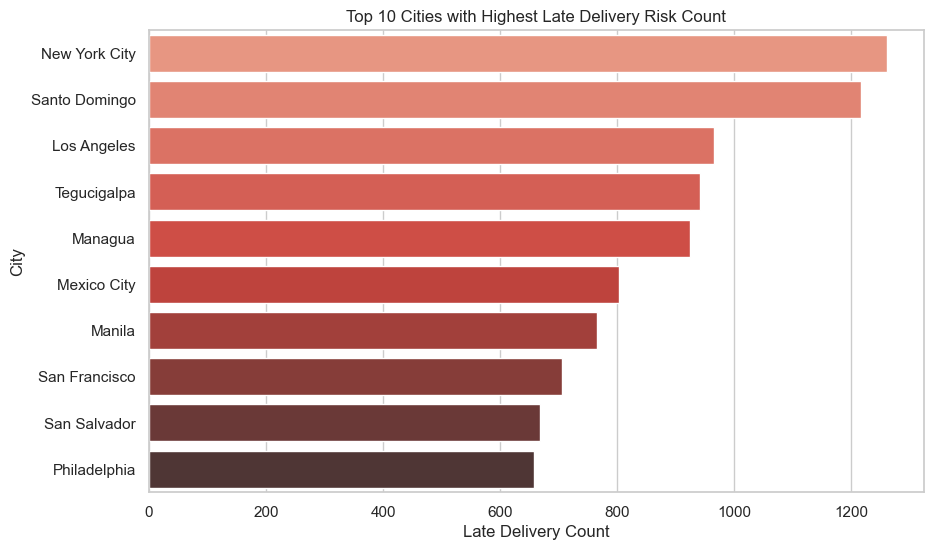

In [58]:
# Set seaborn style
sns.set(style="whitegrid")

# Top 10 Cities by Late Delivery Count
top_cities = geo_analysis.sort_values(by='Late_Delivery_Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Late_Delivery_Count', y='Order City', hue='Order City', data=top_cities, palette='Reds_d')
plt.title('Top 10 Cities with Highest Late Delivery Risk Count')
plt.xlabel('Late Delivery Count')
plt.ylabel('City')
plt.show()

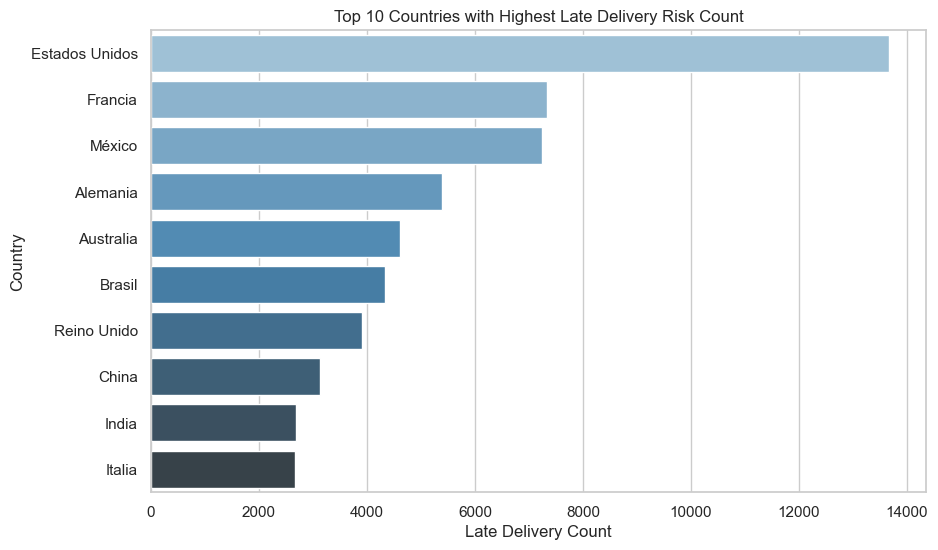

In [59]:
# Top 10 Countries by Late Delivery Count
top_countries = geo_analysis.groupby('Order Country').agg(
    Late_Delivery_Count=pd.NamedAgg(column='Late_Delivery_Count', aggfunc='sum'),
    Total_Deliveries=pd.NamedAgg(column='Total_Deliveries', aggfunc='sum')
).reset_index()

top_countries = top_countries.sort_values(by='Late_Delivery_Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Late_Delivery_Count', y='Order Country', hue='Order Country', data=top_countries, palette='Blues_d')
plt.title('Top 10 Countries with Highest Late Delivery Risk Count')
plt.xlabel('Late Delivery Count')
plt.ylabel('Country')
plt.show()

#### Product Category Analysis

Here we evaluate the imact of the product categories on late deliveries. With this we aim to identify which product categories are more prone to late deliveries, offering insights into potential logistical inefficiencies for certain products.

In [60]:
# Group by 'Category Name' and calculate late deliveries and total deliveries
product_category_analysis = df_cleaned.groupby('Category Name').agg(
    Late_Delivery_Count=pd.NamedAgg(column='Late_delivery_risk', aggfunc=lambda x: (x == 1).sum()),
    Total_Deliveries=pd.NamedAgg(column='Late_delivery_risk', aggfunc='size')
).reset_index()

# Calculate the percentage of late deliveries for each product category
product_category_analysis['Late_Delivery_Percentage'] = (product_category_analysis['Late_Delivery_Count'] / product_category_analysis['Total_Deliveries']) * 100

# Sort by Late_Delivery_Count in descending order
product_category_analysis = product_category_analysis.sort_values(by='Late_Delivery_Count', ascending=False)

# Display the result
product_category_analysis

,Category Name,Late_Delivery_Count,Total_Deliveries,Late_Delivery_Percentage
12,Cleats,13496,24551,54.971284
34,Men's Footwear,12121,22246,54.486200
47,Women's Apparel,11476,21035,54.556691
30,Indoor/Outdoor Games,10565,19298,54.746606
18,Fishing,9516,17325,54.926407
46,Water Sports,8517,15540,54.806950
9,Camping & Hiking,7487,13729,54.534198
10,Cardio Equipment,6805,12487,54.496677
38,Shop By Sport,6058,10984,55.152950
17,Electronics,1770,3156,56.083650


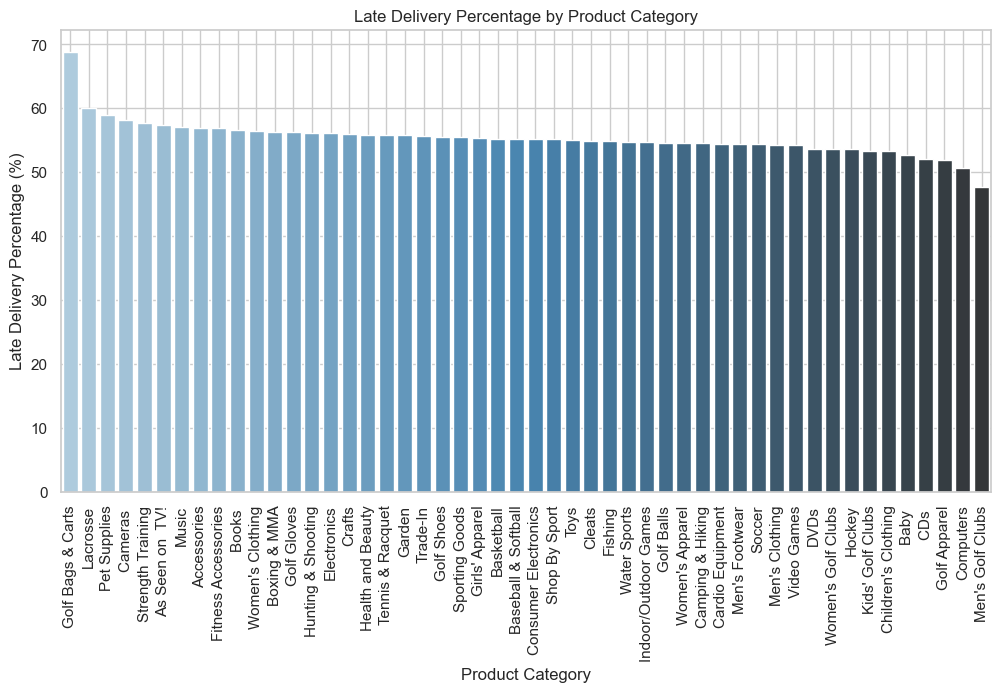

In [61]:
# Sort the data by Late_Delivery_Percentage in descending order
product_category_analysis = product_category_analysis.sort_values(by="Late_Delivery_Percentage", ascending=False)

# Set seaborn style
sns.set(style="whitegrid")

# Create a bar plot using seaborn with hue and palette
plt.figure(figsize=(12, 6))
sns.barplot(x="Category Name", y="Late_Delivery_Percentage", data=product_category_analysis, palette="Blues_d", hue="Category Name")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Product Category')
plt.ylabel('Late Delivery Percentage (%)')
plt.title('Late Delivery Percentage by Product Category')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()

## Hypothesis 1 - Supply Chain Optimization

"Improved supply chain visibility through real-time analytics reduces the frequency of late deliveries."

Here we aim to levarage real-time analytics to improve supply chain visibility and reduce late deliveries. by analyzing various features related to shipping schediles, order details, and egographical factors we can build predective models to identify the key drivers of late deliveries.

#### Feature Engineering

We first used StringIndexer to convert the categorical columns Market and Shipping Mode into numerical indices for model processing. A new feature, Price per Item, was created by dividing the total product price by the quantity sold.

Additionally, we generated two interaction terms: Days_Market_Interaction and Days_ShippingMode_Interaction. These capture the combined effects of scheduled shipping days with market regions and shipping modes, respectively, to better model regional and logistical variations in delivery performance.

In [62]:
# Index the 'Market' and 'Shipping Mode' columns
label_encoder_market = LabelEncoder()
label_encoder_shipping_mode = LabelEncoder()

df_cleaned['Market_index'] = label_encoder_market.fit_transform(df_cleaned['Market'])
df_cleaned['Shipping_Mode_index'] = label_encoder_shipping_mode.fit_transform(df_cleaned['Shipping Mode'])


In [63]:
# Feature Engineering: Creating interaction terms and additional features
df_cleaned['Price_per_item'] = df_cleaned['Order Item Product Price'] / df_cleaned['Order Item Quantity']
df_cleaned['Days_Market_Interaction'] = df_cleaned['Days for shipment (scheduled)'] * df_cleaned['Market_index']
df_cleaned['Days_ShippingMode_Interaction'] = df_cleaned['Days for shipment (scheduled)'] * df_cleaned['Shipping_Mode_index']


##### Handling Categorical Features

Here we prepare the categorical and numerical features applying ColumnTransformer to convert them into numerical

In [64]:
# Create a list of categorical and numerical columns
categorical_features_h1 = ['Order Region', 'Order Country', 'Product Category Id', 'Customer Segment', 'Order Status']
numeric_features_h1 = ['Days for shipment (scheduled)', 'Order Item Quantity', 'Order Item Total','Price_per_item', 'Days_Market_Interaction', 'Days_ShippingMode_Interaction', 'Order Item Discount Rate']


In [65]:
# We'll use ColumnTransformer to handle both OneHotEncoding and numerical scaling in one pipeline.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_h1),  # OneHotEncoder for categorical features
        ('num', StandardScaler(), numeric_features_h1)      # StandardScaler for numerical features
    ]
)


##### Model Training

In here we define the Random Forest classifier model, starting with building the pipeline to include the feature processing and the model, then we split the data into training and testing sets, fits the model on the training data, makes predictions and evaluates the model's performance using the Area Under the ROC Curve (AUC)

In [66]:
# Assemble the final features and define the RandomForest model
rf_Supply = RandomForestClassifier(n_estimators=100, random_state=42)

In [67]:
# Create a pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_Supply)
])

In [68]:
# Split the data into training and testing sets
X = df_cleaned[categorical_features_h1 + numeric_features_h1 + ['Market_index', 'Shipping_Mode_index']]
y = df_cleaned['Late_delivery_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [69]:
# Fit the model and make predictions
rf_model = pipeline_rf.fit(X_train, y_train)
y_pred = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Evaluate the model
auc = roc_auc_score(y_test, y_pred)
print(f"Random Forest AUC: {auc}")

Random Forest AUC: 0.7659949871313068


##### Handle Class Imbalance

In this code, we use cross-validation to optimize the Random Forest model by testing different maxDepth and numTrees values. After fitting the model, we evaluate its performance with the cross-validated AUC score, ensuring better model generalization.

In [70]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__max_depth': [5, 10, 15],       # Grid for maximum depth
    'classifier__n_estimators': [50, 100],      # Grid for number of trees
    'classifier__min_samples_split': [2, 5],    # Grid for minimum samples to split a node
}

# Use AUC as the scoring metric
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Set up GridSearchCV for cross-validation and hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid, scoring=scorer, cv=3, verbose=2, n_jobs=-1)

# Fit the cross-validated model
grid_search.fit(X_train, y_train)

# Get the best model from cross-validation
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_cv = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Evaluate the best model using AUC
auc_rf_cv = roc_auc_score(y_test, y_pred_cv)
print(f"Random Forest Cross-Validated AUC: {auc_rf_cv}")
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Random Forest Cross-Validated AUC: 0.7761608681232477
Best Parameters: {'classifier__max_depth': 15, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


In [71]:
# Assuming best_model is the trained pipeline
rf_model = best_model.named_steps['classifier']

# Get feature importances from RandomForestClassifier
rf_feature_importances = rf_model.feature_importances_

# Get the feature names after OneHotEncoding and scaling
onehot_feature_names = best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features_h1)
all_feature_names = np.hstack([onehot_feature_names, numeric_features_h1, ['Market_index', 'Shipping_Mode_index']])

# If the number of feature importances is different from feature names (e.g., sparse features), trim it
if len(all_feature_names) != len(rf_feature_importances):
    all_feature_names = all_feature_names[:len(rf_feature_importances)]

# Create a DataFrame with feature names and their importances
importance_data = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 20 important features
print("Top 20 Important Features:")
print(importance_data.head(20))

Top 20 Important Features:
                           Feature  Importance
253  Days_ShippingMode_Interaction    0.325900
248  Days for shipment (scheduled)    0.284843
252        Days_Market_Interaction    0.128271
247   Order Status_SUSPECTED_FRAUD    0.079023
239          Order Status_CANCELED    0.073998
250               Order Item Total    0.010982
254       Order Item Discount Rate    0.008949
241          Order Status_COMPLETE    0.006334
251                 Price_per_item    0.006077
245   Order Status_PENDING_PAYMENT    0.003904
249            Order Item Quantity    0.003453
70    Order Country_Estados Unidos    0.003043
236      Customer Segment_Consumer    0.002335
246        Order Status_PROCESSING    0.002266
237     Customer Segment_Corporate    0.002256
244           Order Status_PENDING    0.002200
238   Customer Segment_Home Office    0.001898
240            Order Status_CLOSED    0.001738
75           Order Country_Francia    0.001363
3     Order Region_Central Americ

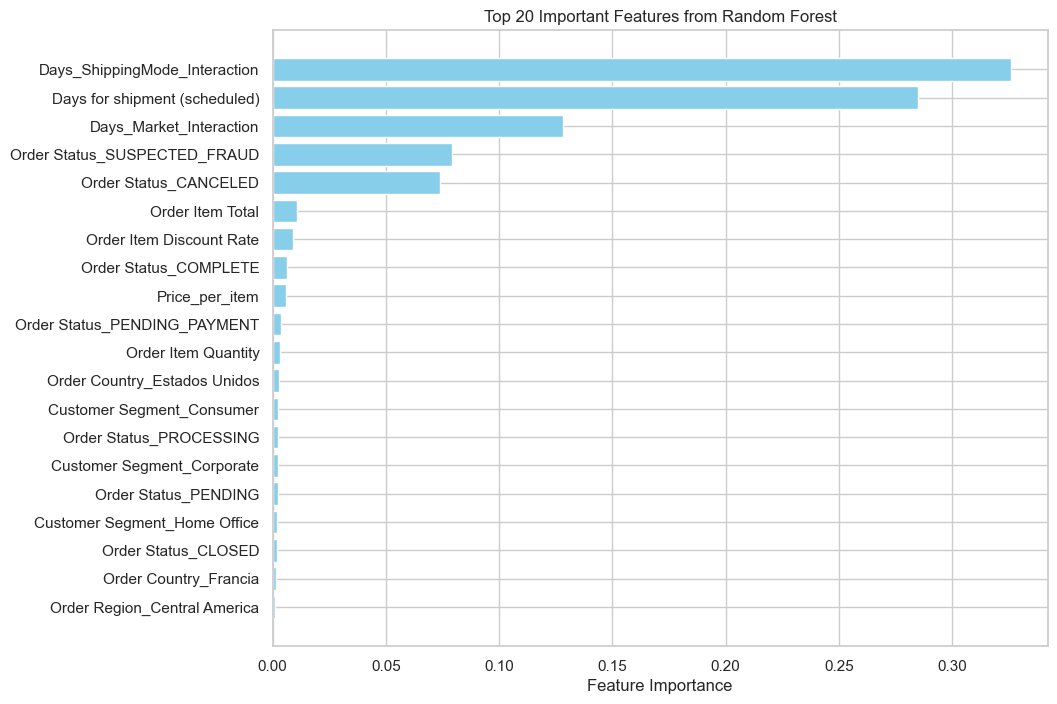

Top 20 Important Features with Original Categories:
                           Feature              Original Category  Importance
253  Days_ShippingMode_Interaction  Days_ShippingMode_Interaction    0.325900
248  Days for shipment (scheduled)  Days for shipment (scheduled)    0.284843
252        Days_Market_Interaction        Days_Market_Interaction    0.128271
247   Order Status_SUSPECTED_FRAUD   Order Status_SUSPECTED_FRAUD    0.079023
239          Order Status_CANCELED          Order Status_CANCELED    0.073998
250               Order Item Total               Order Item Total    0.010982
254       Order Item Discount Rate       Order Item Discount Rate    0.008949
241          Order Status_COMPLETE          Order Status_COMPLETE    0.006334
251                 Price_per_item                 Price_per_item    0.006077
245   Order Status_PENDING_PAYMENT   Order Status_PENDING_PAYMENT    0.003904
249            Order Item Quantity            Order Item Quantity    0.003453
70    Order 

In [72]:
# Plot the top 20 important features
plt.figure(figsize=(10, 8))
plt.barh(importance_data['Feature'].head(20), importance_data['Importance'].head(20), color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Important Features from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

# Function to map one-hot encoded features back to their original category names
def get_original_category(feature_name):
    if '_ohe_' in feature_name:
        col_name, index = feature_name.split('_ohe_h1_')
        index = int(index)

        # Mapping OneHotEncoder categories back to their original labels
        encoder = best_model.named_steps['preprocessor'].transformers_[0][1]
        original_labels = encoder.categories_[categorical_features_h1.index(col_name)]

        if index < len(original_labels):
            return original_labels[index]
        else:
            return "Unknown Category"
    return feature_name

# Apply the function to map feature names back to their original categories
importance_data['Original Category'] = importance_data['Feature'].apply(get_original_category)

# Display the top 20 features with their original categories
print("Top 20 Important Features with Original Categories:")
print(importance_data[['Feature', 'Original Category', 'Importance']].head(20))

## Hypothesis 2.

"Certain product categories, order sizes, and discount rates significantly increase the risk of late deliveries, leading to potential customer dissatisfaction."

This hypothesis would help us to identify specific operational factors that directly influence late deliveries so the company can focus on business practices that can change to improve delivery efficiency.

##### Dynamic Feature Encoding

Here we apply StringIndexer and OneHotEncoder only when necessary, avoiding duplication. It then assembles the categorical and numerical features into a feature vector for the second model, stored in the features_h2 column.

In [73]:
# Define categorical features for Hypothesis 2
categorical_features_h2 = ['Order Region', 'Order Country', 'Product Category Id', 'Customer Segment', 'Order Status', 'Shipping Mode']


In [74]:
# Create lists to store indexers and encoders
indexers_h2 = []
encoders_h2 = []

# Apply LabelEncoder (equivalent to StringIndexer in PySpark) and OneHotEncoder
for column in categorical_features_h2:
    indexed_col = column + "_index_h2"
    ohe_col = column + "_ohe_h2"

    if indexed_col not in df_cleaned.columns:
        # Apply LabelEncoder
        label_encoder = LabelEncoder()
        df_cleaned[indexed_col] = label_encoder.fit_transform(df_cleaned[column])
        indexers_h2.append(label_encoder)
    else:
        print(f"Skipping LabelEncoder for {column} as {indexed_col} already exists")

In [75]:
# Define preprocessing for the pipeline
preprocessor_h2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_h2),  # OneHotEncoder for categorical features
        ('num', StandardScaler(), numeric_features_h1)      # StandardScaler for numerical features
    ]
)

##### Model training

For this hypothesis we will be setting up and evaluating three machine learning models (Random Forest, Logistic Regression and Gradient Boosted Trees) to predict late delivery risks. Here we build separate pipelines for each model, and assessing the models using AUC (Area under the ROC Curve) to measure performance. 

In [76]:
# Models to be used: Random Forest, Logistic Regression, and Gradient Boosted Trees
rf_2 = RandomForestClassifier(n_estimators=100, random_state=42)
lr_2 = LogisticRegression(max_iter=500, solver='liblinear')
gbt_2 = GradientBoostingClassifier(n_estimators=100)

In [77]:
# Create pipelines for each model
pipeline_rf_h2 = Pipeline(steps=[('preprocessor', preprocessor_h2), ('classifier', rf_2)])
pipeline_lr_h2 = Pipeline(steps=[('preprocessor', preprocessor_h2), ('classifier', lr_2)])
pipeline_gbt_h2 = Pipeline(steps=[('preprocessor', preprocessor_h2), ('classifier', gbt_2)])

In [78]:
# Split the data into training and testing sets
X = df_cleaned[categorical_features_h2 + numeric_features_h1]
y = df_cleaned['Late_delivery_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
# Function to train and evaluate models
def evaluate_model_2(pipeline, X_train, X_test, y_train, y_test, model_name):
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} AUC: {auc}")
    return model

In [80]:
# Random Forest
rf_model_h2 = evaluate_model_2(pipeline_rf_h2, X_train, X_test, y_train, y_test, "Random Forest")

# Logistic Regression
lr_model_h2 = evaluate_model_2(pipeline_lr_h2, X_train, X_test, y_train, y_test, "Logistic Regression")

# Gradient Boosted Trees
gbt_model_h2 = evaluate_model_2(pipeline_gbt_h2, X_train, X_test, y_train, y_test, "Gradient Boosting Trees")


Random Forest AUC: 0.7674362190729126
Logistic Regression AUC: 0.7707757241703801
Gradient Boosting Trees AUC: 0.7711252265589422


##### Features Importance Result Analysis

Here we generate a one-hot encoded feature names for categorical variables and aligns them with the Random Forest’s feature importances. We aim to check if the number of features matches the importances, then ranks and visualizes the top 20 important features in a bar chart to highlight key drivers of late delivery risk.

In [81]:
# Feature importance for Random Forest model
rf_feature_importances_h2 = rf_model_h2.named_steps['classifier'].feature_importances_

In [82]:
# Combine one-hot encoded features with numeric features
one_hot_encoded_feature_names_h2 = pipeline_rf_h2.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features_h2)
all_feature_names_h2 = np.hstack([one_hot_encoded_feature_names_h2, numeric_features_h1])

                           Feature  Importance
254               Order Item Total    0.157683
258       Order Item Discount Rate    0.141494
257  Days_ShippingMode_Interaction    0.061016
255                 Price_per_item    0.051520
251   Shipping Mode_Standard Class    0.043411
252  Days for shipment (scheduled)    0.043112
248      Shipping Mode_First Class    0.035653
256        Days_Market_Interaction    0.030903
247   Order Status_SUSPECTED_FRAUD    0.028506
253            Order Item Quantity    0.027760
239          Order Status_CANCELED    0.026336
236      Customer Segment_Consumer    0.016146
237     Customer Segment_Corporate    0.013605
238   Customer Segment_Home Office    0.012745
250     Shipping Mode_Second Class    0.011319
241          Order Status_COMPLETE    0.010465
245   Order Status_PENDING_PAYMENT    0.009608
240            Order Status_CLOSED    0.009172
197         Product Category Id_17    0.008491
246        Order Status_PROCESSING    0.008092


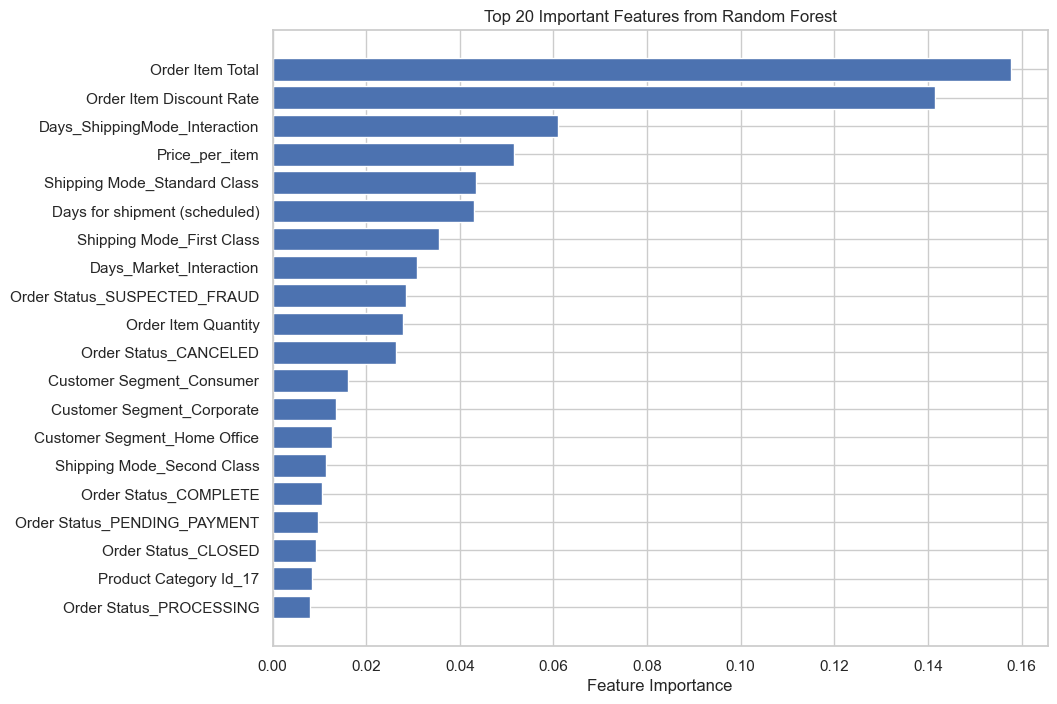

In [83]:
# Check if lengths match and display feature importances
if len(rf_feature_importances_h2) == len(all_feature_names_h2):
    importance_data_h2 = pd.DataFrame({
        'Feature': all_feature_names_h2,
        'Importance': rf_feature_importances_h2
    }).sort_values(by='Importance', ascending=False)

    print(importance_data_h2.head(20))
    plt.figure(figsize=(10, 8))
    plt.barh(importance_data_h2['Feature'].head(20), importance_data_h2['Importance'].head(20))
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Important Features from Random Forest')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("The lengths of feature names and importances do not match!")

##### Logistic Regression Coefficients

Here we expect to understand not just the importance, but the direction of the relationship of the features and the Late Delivery Risk.

In [84]:
# Train Logistic Regression model and analyze coefficients
lr_model_h2 = pipeline_lr_h2.fit(X_train, y_train)
logistic_regression_stage_h2 = lr_model_h2.named_steps['classifier']
coefficients_h2 = logistic_regression_stage_h2.coef_[0]
intercept_h2 = logistic_regression_stage_h2.intercept_[0]

In [85]:
# Combine one-hot encoded feature names with numeric features
all_feature_names_h2 = np.hstack([one_hot_encoded_feature_names_h2, numeric_features_h1])

In [86]:
# Create DataFrame with feature names and coefficients
coefficient_data_h2 = pd.DataFrame({
    'Feature': all_feature_names_h2,
    'Coefficient': coefficients_h2
}).sort_values(by='Coefficient', ascending=False)

# Display top 20 coefficients
print("Logistic Regression Coefficients (Hypothesis 2):")
print(coefficient_data_h2.head(20))

Logistic Regression Coefficients (Hypothesis 2):
                                    Feature  Coefficient
248               Shipping Mode_First Class     3.756163
244                    Order Status_PENDING     2.364273
245            Order Status_PENDING_PAYMENT     2.339200
246                 Order Status_PROCESSING     2.326536
241                   Order Status_COMPLETE     2.325318
243             Order Status_PAYMENT_REVIEW     2.284429
240                     Order Status_CLOSED     2.281001
242                    Order Status_ON_HOLD     2.254361
105                      Order Country_Laos     1.148290
47                      Order Country_Bután     1.122876
110                Order Country_Luxemburgo     1.048140
71                    Order Country_Estonia     1.047985
182                    Order Country_Yibuti     1.045809
172              Order Country_Turkmenistán     0.809243
125                   Order Country_Namibia     0.699360
131                     Order Country_N

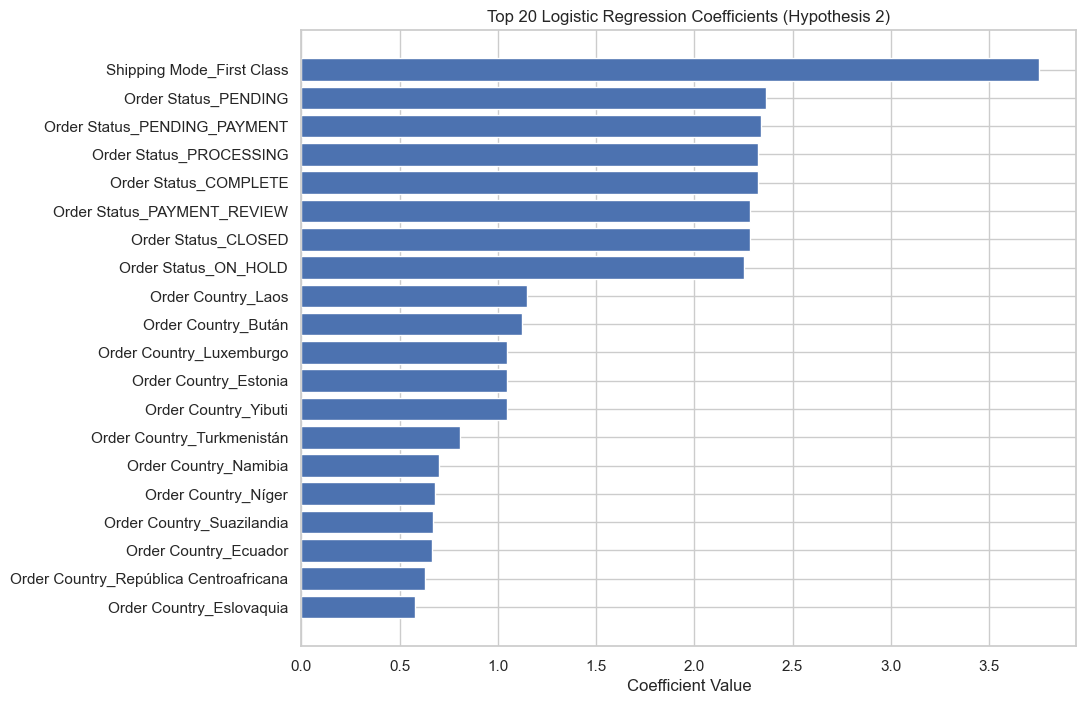

Intercept: -0.6979575235898041


In [87]:
# Plot the top 20 coefficients
plt.figure(figsize=(10, 8))
plt.barh(coefficient_data_h2['Feature'].head(20), coefficient_data_h2['Coefficient'].head(20))
plt.xlabel('Coefficient Value')
plt.title('Top 20 Logistic Regression Coefficients (Hypothesis 2)')
plt.gca().invert_yaxis()
plt.show()

# Print the intercept
print(f"Intercept: {intercept_h2}")